In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'c:\\Users\\mahen\\OneDrive\\Desktop\\healthcare-dataset-stroke-data.csv')

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

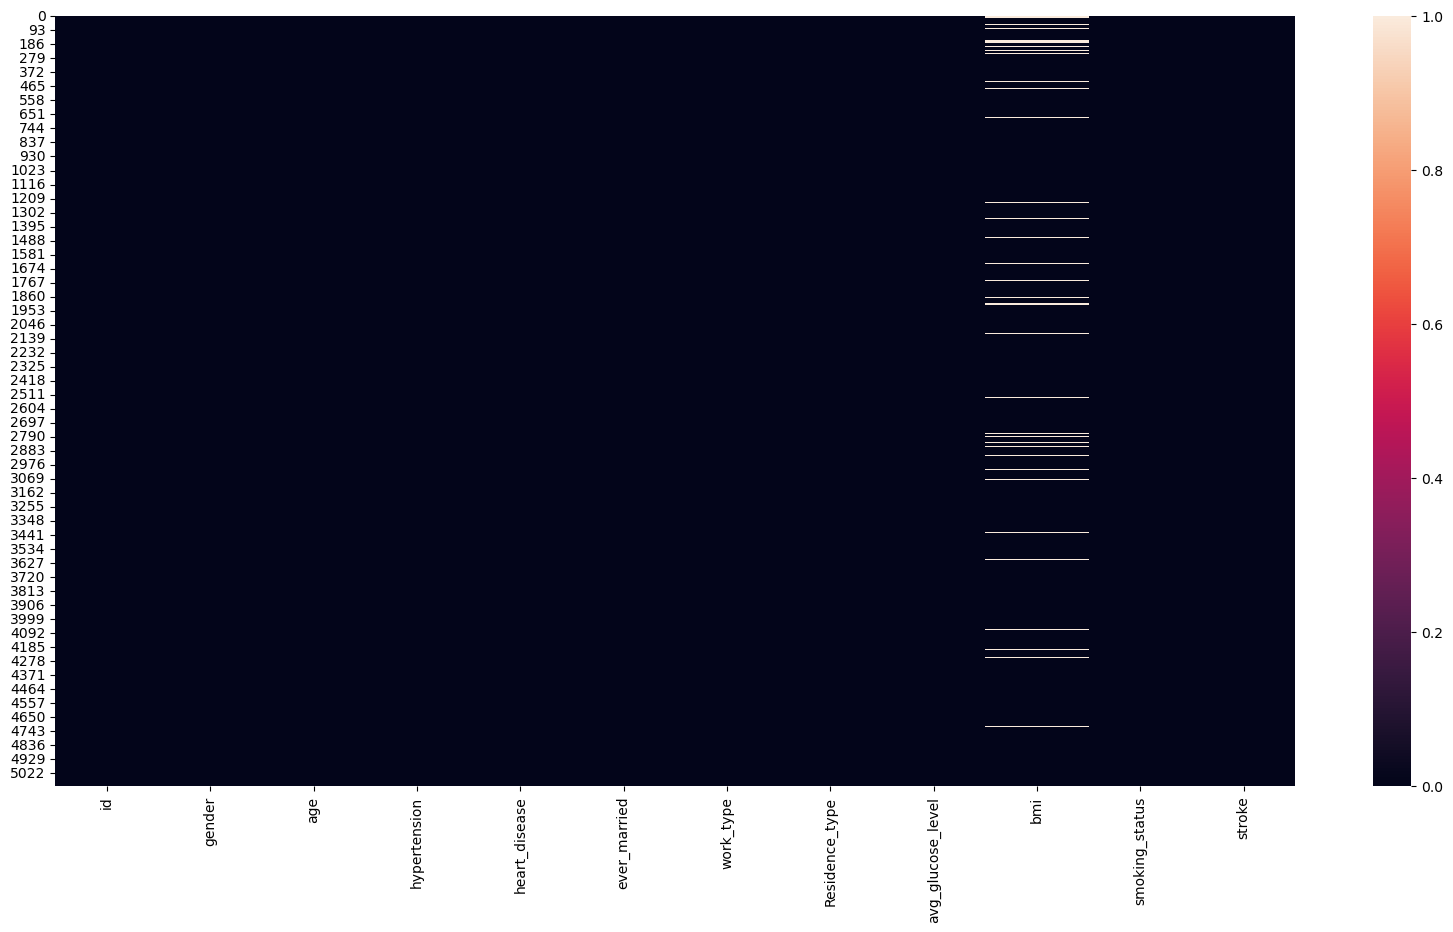

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()
df.isna().sum()

In [10]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [12]:
df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [13]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [14]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [15]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [16]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [17]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [18]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [20]:
cat_cols=df[['smoking_status','Residence_type','work_type','ever_married','gender']]

In [22]:
for col in cat_cols:
    lb=LabelEncoder()
    df[col]=lb.fit_transform(df[col])


In [23]:
df.dtypes

id                     int64
gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [24]:
df['bmi'].max()

97.6

In [25]:
df['bmi'].min()

10.3

<AxesSubplot:ylabel='Frequency'>

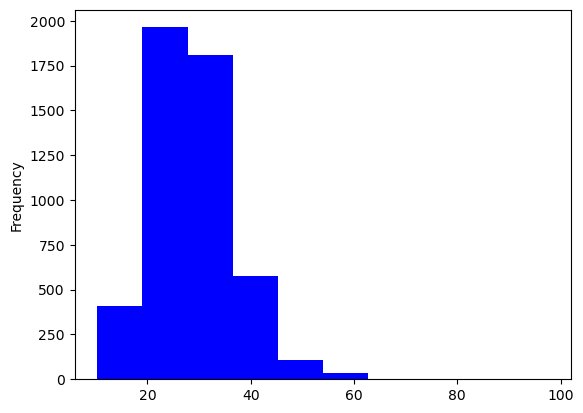

In [26]:
df['bmi'].plot(kind='hist',color='b')

In [27]:
df['bmi'].mean()

28.893236911794673

In [28]:
df['bmi'].fillna(value=28.893236911794673,inplace=True)

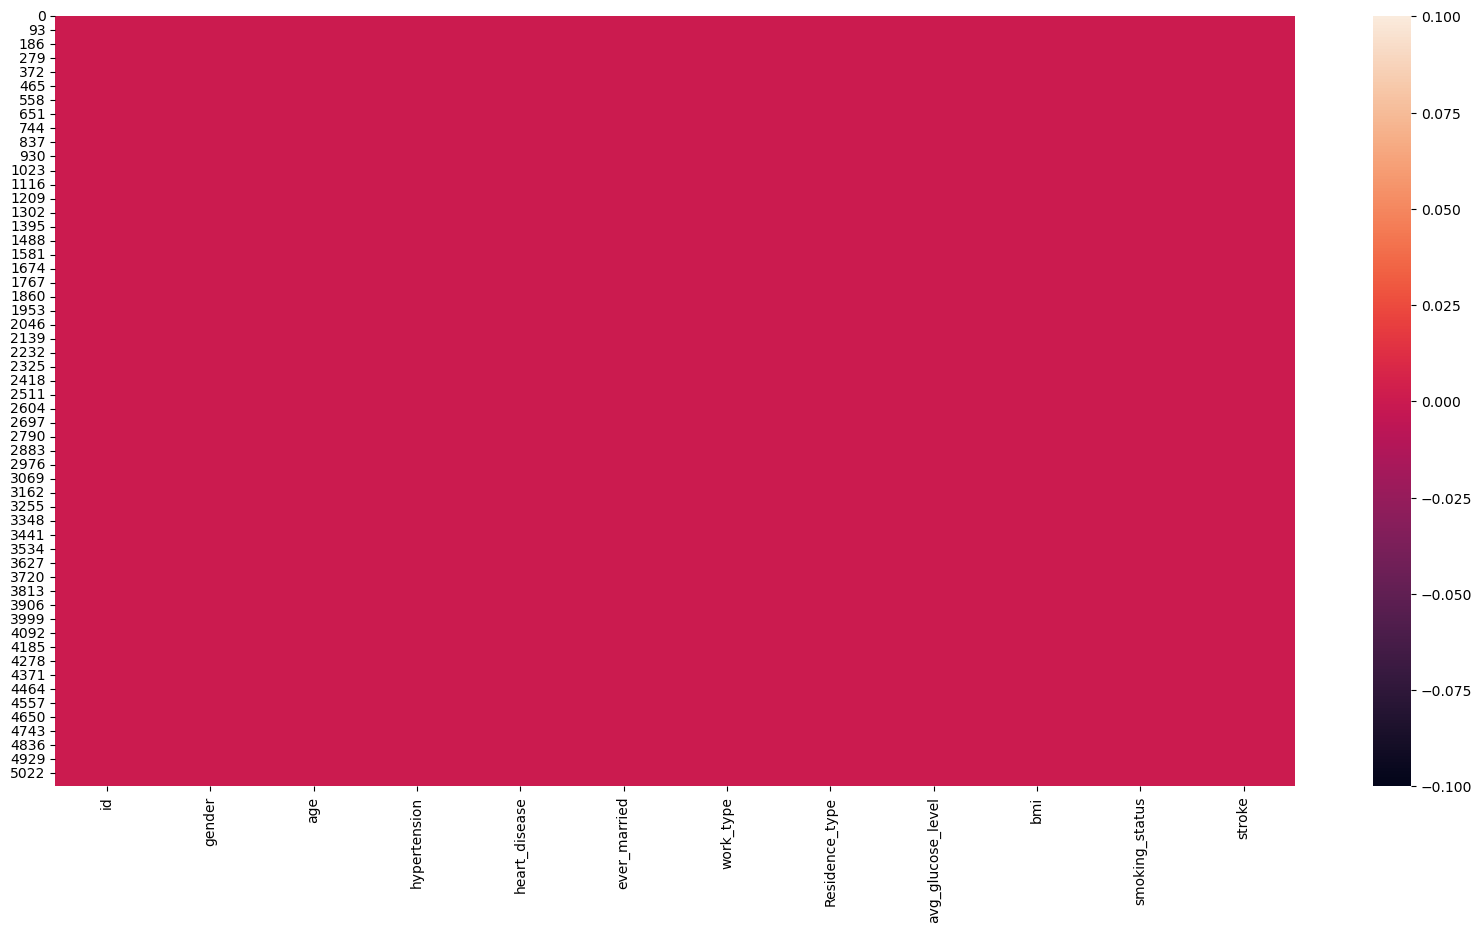

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()
df.isna().sum()

In [37]:
df.shape

(5110, 12)

In [53]:
X=df.drop('stroke',axis=1).values
X.shape

(5110, 11)

In [54]:
y=df['stroke'].values
y.shape

(5110,)

In [55]:
from sklearn.preprocessing import StandardScaler

In [59]:
X=StandardScaler().fit_transform(X)

In [60]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.3)

In [67]:
X_train.shape

(3577, 11)

In [68]:
from sklearn.linear_model import LogisticRegression

In [112]:
from sklearn.linear_model import LogisticRegression
model_LR= LogisticRegression()
model_LR.fit(X_train,y_train)

LogisticRegression()

In [127]:
Prediction=model_LR.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,Prediction))

0.9549902152641878


In [126]:
confusion_matrix(y_test,Prediction)

array([[1464,    0],
       [  69,    0]], dtype=int64)